In [33]:
import sklearn
from sklearn import datasets

iris = datasets.load_iris()
X_temp = iris.data
y_temp = iris.target
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# শুধুমাত্র প্রথম দুটো অ্যাট্রিবিউট নিয়ে আমাদের ডেটাসেট 
X, y = X_temp[:, [0,1]], y_temp
# আমাদের টেস্টসেট হবে ২৫%, দৈবচয়নের ভিত্তিতে 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
    
# ফিচারগুলোকে স্ট্যান্ডার্ডাইজ করছি এখানে 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
import copy 
y_train_setosa = copy.copy(y_train) 
# আমাদের ট্রেনিংসেটের ১ এবং ২ ক্লাসকে ১ বানিয়ে ফেলছি 
y_train_setosa[y_train_setosa > 0]=1
y_test_setosa = copy.copy(y_test)
y_test_setosa[y_test_setosa > 0]=1
# এখন দেখি ট্রেনিং টার্গেট ক্লাসগুলো কী কী?
print ('New training target classes:\n{0}'.format(y_train_setosa))

New training target classes:
[1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 0]


In [35]:
from sklearn import linear_model 
clf = linear_model.SGDClassifier(loss='log', random_state=42)

clf.fit(X_train, y_train_setosa)

print (clf.coef_[0],clf.intercept_[0])

[ 21.76180378 -10.51985219] 13.907630261760772


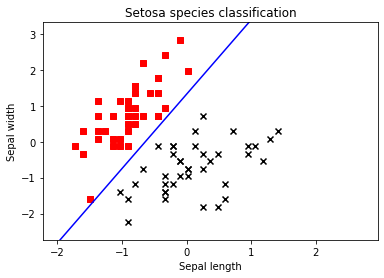

In [39]:
import numpy as np
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)

#https://www.youtube.com/watch?v=81ZGOib7DTk

m = -clf.coef_[0][0]/clf.coef_[0][1];
c = -clf.intercept_[0]/clf.coef_[0][1];

ys = m*xs + c;

#ys = (-clf.intercept_[0]- xs * clf.coef_[0, 0]) / clf.coef_[0, 1] #shortcut,mukhosto!!!
import matplotlib.pyplot as plt

fig,axes = plt.subplots()

#axes.set_aspect('equal')
axes.set_title('Setosa species classification')
axes.set_xlabel('Sepal length')
axes.set_ylabel('Sepal width')
axes.set_xlim(x_min, x_max)
axes.set_ylim(y_min, y_max)

#plt.sca(axes)

plt.scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], c='red', marker='s')
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], c='black', marker='x')
plt.plot(xs,ys,'k-',c='blue')




In [40]:
#prediction
print ('If the flower has 4.6 petal width and 3.2 petal length is a {}'.format(
        iris.target_names[clf.predict(scaler.transform([[4.6, 3.2]]))]))

If the flower has 4.6 petal width and 3.2 petal length is a ['setosa']
